In [1]:
print('practice')

practice


In [2]:
!pip uninstall tensorflow

^C


# 1

In [3]:
import tensorflow as tf
import numpy as np

# Generate dummy data
X_train = np.random.rand(100, 10)
y_train = (X_train.sum(axis=1) > 5).astype(int)  # Binary target

# Create a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=8)

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train)
print(f'TensorFlow Model Accuracy: {accuracy:.2f}')


C:\Users\awach\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5097 - loss: 0.7443  
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.4885 - loss: 0.7358
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.5241 - loss: 0.7117
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.5141 - loss: 0.7024
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.5056 - loss: 0.7029
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.4936 - loss: 0.7000
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.4758 - loss: 0.6959
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.5283 - loss: 0.6966
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.5725 - loss: 0.6917
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.5178 - loss: 0.6791
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5412 - loss: 0.6859 
TensorFlow Model Accuracy: 0.53


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

# Generate dummy data
X_train = torch.rand(100, 10)
y_train = (X_train.sum(dim=1) > 5).float()  # Binary target

# Create a simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return torch.sigmoid(self.fc2(x))

# Instantiate the model, define the loss function and optimizer
model = SimpleModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Training the model
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs.squeeze(), y_train)
    loss.backward()
    optimizer.step()

# Evaluate the model
with torch.no_grad():
    predicted = (model(X_train).squeeze() > 0.5).float()
    accuracy = (predicted == y_train).float().mean()
    print(f'PyTorch Model Accuracy: {accuracy:.2f}')


PyTorch Model Accuracy: 0.96


# 2

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data = pd.read_csv("D:\Atharva\STUDY\I2IT\BE\Academic\DL\Practical\SS_Dataset\diabetes.csv")#'path/to/diabetes.csv')  # Replace with actual path to the dataset

# Separate features and target
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Keep track of the original indices
original_indices = data.index

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X, y, original_indices, test_size=0.2, random_state=42
)

# Scale the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

# Evaluate on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Test case prediction
sample_index = 0  # Index of the sample you want to predict
sample_data = X_test[sample_index].reshape(1, -1)  # Taking the sample for prediction

# Get the original patient details using the stored test indices
patient_details = data.iloc[test_indices[sample_index]]

# Make prediction
prediction = model.predict(sample_data)
predicted_outcome = (prediction[0][0] > 0.5).astype(int)  # Threshold at 0.5 for binary outcome

# Print patient details and prediction
print("\nPatient Details:")
print(patient_details)

print("\nTest Case Prediction (Outcome Probability):", prediction[0][0])
print("Predicted Outcome (0: No Diabetes, 1: Diabetes):", predicted_outcome)


Epoch 1/10


C:\Users\awach\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5202 - loss: 0.7904 - val_accuracy: 0.5161 - val_loss: 0.7894
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5584 - loss: 0.7033 - val_accuracy: 0.5484 - val_loss: 0.7347
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6142 - loss: 0.6684 - val_accuracy: 0.5806 - val_loss: 0.6983
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6785 - loss: 0.6399 - val_accuracy: 0.6452 - val_loss: 0.6702
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6663 - loss: 0.6217 - val_accuracy: 0.6935 - val_loss: 0.6410
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6981 - loss: 0.5789 - val_accuracy: 0.7258 - val_loss: 0.6213
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7213 - loss: 0.5578 - val_accuracy: 0.7097 - val_loss: 0.5999
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7432 - loss: 0.5317 - val_accuracy: 0.7419 - val_loss: 0.5841
Epo

# 3

C:\Users\awach\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8697 - loss: 0.4313 - val_accuracy: 0.9613 - val_loss: 0.1280
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9657 - loss: 0.1109 - val_accuracy: 0.9680 - val_loss: 0.1047
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9766 - loss: 0.0743 - val_accuracy: 0.9764 - val_loss: 0.0778
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9825 - loss: 0.0544 - val_accuracy: 0.9732 - val_loss: 0.0957
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9869 - loss: 0.0431 - val_accuracy: 0.9745 - val_loss: 0.0938
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9892 - loss: 0.0346 - val_accuracy: 0.9777 - val_loss: 0.0833
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9910 - loss: 0.0292 - val_accuracy: 0.9736 - val_loss: 0.1026
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9914 - loss: 0.0245 - 

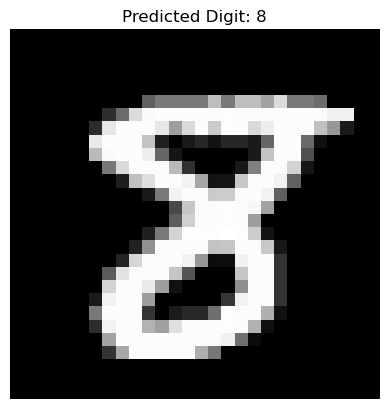

In [9]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"D:\Atharva\STUDY\I2IT\BE\Academic\DL\Practical\SS_Dataset\3 MNIST-20241105T053934Z-001\3 MNIST\mnist_784_csv.csv")  # Replace with the actual path

# Separate features and target
X = data.drop(columns=['class']).values
y = data['class'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the pixel values to (0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build and compile the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),                                   # Hidden layer
    Dense(10, activation='softmax')                                 # Output layer for 10 classes
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f"\nTest Accuracy: {accuracy:.4f}")

# Make a prediction on the first test sample
sample_index = 0  # Change this index for different test samples
sample_data = X_test[sample_index].reshape(1, -1)
predicted_label = model.predict(sample_data).argmax()

# Get details of the test case
test_case_details = X_test[sample_index].reshape(28, 28)  # Reshape for display

# Print test case prediction
print("\nTest Case Prediction (Predicted Digit):", predicted_label)

# Plot the test case image
plt.imshow(test_case_details, cmap='gray')
plt.title(f'Predicted Digit: {predicted_label}')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


# 4

Found 48000 images belonging to 10 classes.
Found 12000 images belonging to 10 classes.


C:\Users\awach\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\awach\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 73ms/step - accuracy: 0.2629 - loss: 2.0149 - val_accuracy: 0.3842 - val_loss: 1.7126
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.3847 - loss: 1.7131
Test accuracy: 0.3842499852180481


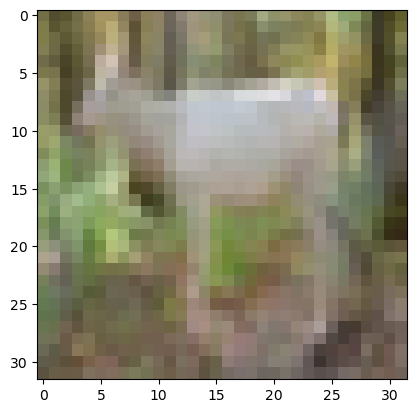

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Prediction: 6


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Define the path to your dataset
data_dir = "D:\Atharva\STUDY\I2IT\BE\Academic\DL\Practical\SS_Dataset\cifar10_dataset\cifar10_dataset"

# Set up the image data generator with a validation split
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)  # 20% of data for validation/testing

# Load the training data with 80% of the images and set aside 20% for validation
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),  # Resize images to CIFAR-10 dimensions
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

# Load the validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

# Define the feedforward neural network
model = Sequential()

# Flatten the 32x32x3 images into a 1D vector of 3072 (32*32*3)
model.add(Flatten(input_shape=(32, 32, 3)))

# Add a fully connected layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))

# Add another fully connected layer with 256 neurons and ReLU activation
model.add(Dense(256, activation='relu'))

# Add another fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons (for each class) and softmax activation
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=1, validation_data=validation_generator)

# Evaluate the model on the validation data
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

# Visualize an example image and its predicted label
class_labels = list(train_generator.class_indices.keys())
n = 5  # Index of the image to visualize
X_test, y_test = next(validation_generator)  # Get a batch of validation images
plt.imshow(X_test[n])
plt.show()
cifars = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
predicted_value = model.predict(X_test)
pred = np.argmax(predicted_value[n])
idx =(int) (class_labels[pred])
print('Prediction:', cifars[idx] )

# 5

C:\Users\awach\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.6739 - loss: 0.8919 - val_accuracy: 0.8456 - val_loss: 0.4193
Epoch 2/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8332 - loss: 0.4557 - val_accuracy: 0.8721 - val_loss: 0.3536
Epoch 3/3
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8580 - loss: 0.3924 - val_accuracy: 0.8860 - val_loss: 0.3159
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8846 - loss: 0.3052
Test accuracy: 0.8866000175476074


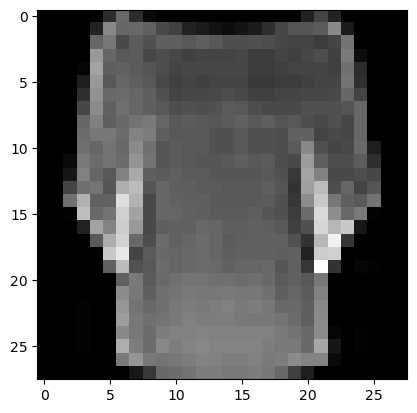

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Prediction: shirt


In [8]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CSV data
def load_data(csv_path, image_size=(28, 28), label_column='label'):
    data = pd.read_csv(csv_path)
    labels = data[label_column].values  # Extract labels
    images = data.drop(columns=[label_column]).values  # Drop label column and get pixel values
    images = images.reshape(-1, image_size[0], image_size[1], 1).astype('float32')  # Reshape to 28x28 and add channel
    images /= 255.0  # Normalize pixel values to [0, 1]
    return images, labels

# Paths to your train and test CSV files
train_csv_path = r"D:\Atharva\STUDY\I2IT\BE\Academic\DL\Practical\SS_Dataset\5 Fashion MNIST-20241105T101436Z-001\5 Fashion MNIST\fashion-mnist_train.csv\fashion-mnist_train.csv"  # Replace with your train CSV file path
test_csv_path = r"D:\Atharva\STUDY\I2IT\BE\Academic\DL\Practical\SS_Dataset\5 Fashion MNIST-20241105T101436Z-001\5 Fashion MNIST\fashion-mnist_test.csv\fashion-mnist_test.csv"    # Replace with your test CSV file path

# Load training and test data
X_train, y_train = load_data(train_csv_path)
X_test, y_test = load_data(test_csv_path)

# One-hot encode the labels
num_classes = len(np.unique(y_train))  # Detect number of unique classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the CNN model
model = Sequential()

# Add a Conv2D layer with 32 filters, 3x3 kernel, ReLU activation, and input shape of 28x28x1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a MaxPooling2D layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling2D layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Flatten the feature maps into a 1D vector
model.add(Flatten())

# Add a fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer with number of neurons equal to number of classes and softmax activation
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Visualize a test image and its predicted label
class_names = [f"Class {i}" for i in range(num_classes)]  # Replace with actual class names if known
n = 5  # Index of the image to visualize
plt.imshow(X_test[n].reshape(28, 28), cmap='gray')
plt.show()

predicted_value = model.predict(X_test)
pred = np.argmax(predicted_value[n])
fashion = ['tshirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot'] 
idx = (int)(class_names[pred][-1])
print('Prediction:', fashion[idx])

# 6

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
dataset_path="C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/Pneumonia_X_Ray"
image_height,image_width=150,150
datagen=ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2)
train_data=datagen.flow_from_directory(
    os.path.join(dataset_path,"train"),
    target_size=(image_height,image_width),
    batch_size=32,
    class_mode='binary',
    subset="training"
)
val_data=datagen.flow_from_directory(
    os.path.join(dataset_path,"train"),
    target_size=(image_height,image_width),
    batch_size=32,
    class_mode='binary',
    subset="validation"
)
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(image_height,image_width,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)
history=model.fit(train_data,validation_data=val_data,epochs=10)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
test_loss,test_accuracy=model.evaluate(val_data)
print("Loss is:",test_loss)
print("Accuracy is:",test_accuracy)
def predict_pneumonia(img_path):
    img=load_img(img_path,target_size=(image_height,image_width))
    image_array=img_to_array(img)/255.0
    image_array=np.expand_dims(image_array,axis=0)  #np.expand_dims adds an extra dimension, so the array fits the model's expected input shape.
    prediction=model.predict(image_array)
    if prediction>[0.5]:
        print("pneumonia Detected")
    else:
        print("No pneumonia Detected")
    plt.imshow(img)
    plt.plot()
predict_pneumonia("C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/Pneumonia_X_Ray/train/PNEUMONIA/person9_bacteria_39.jpeg")
predict_pneumonia("C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/Pneumonia_X_Ray/train/NORMAL/NORMAL2-IM-0682-0001.jpeg")

# 7

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
dataset_path = "C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/Brain_Tumor/brain tumour"
image_width,image_height=150,150
datagen=ImageDataGenerator(rescale=1.0/255.0)
train_data=datagen.flow_from_directory(
    os.path.join(dataset_path,'Training'),
    target_size=(image_width,image_height),
    batch_size=32,
    class_mode='categorical'
)
val_data=datagen.flow_from_directory(
    os.path.join(dataset_path,'Testing'),
    target_size=(image_width,image_height),
    batch_size=32,
    class_mode='categorical'
)
model=Sequential([
    Conv2D(32,(2,2),activation='relu',input_shape=(image_width,image_height,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(2,2),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32,(2,2),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(4,activation='softmax') 
])
model.compile(
    metrics=['accuracy'],
    loss='categorical_crossentropy',
    optimizer='adam'
)
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)
val_loss,val_acc=model.evaluate(val_data)
print("Validation_Loss:",val_loss)
print("Validation_Accuracy:",val_acc)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='Train_Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.plot('Epochs')
plt.plot('Loss')
plt.legend()
plt.show()
def predict_image(img_path):
    img=load_img(img_path,target_size=(image_width,image_height))
    image_array=img_to_array(img)/255.0
    image_array=np.expand_dims(image_array,axis=0)
    prediction=model.predict(image_array)
    class_labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
    predicted_class=np.argmax(prediction,axis=1)[0]
    print(f"The model predicts: {class_labels[predicted_class]}")
    plt.imshow(img)
    plt.axis('off')
    plt.plot()
predict_image("C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/Brain_Tumor/brain tumour/Training/meningioma_tumor/m (29).jpg")
predict_image("C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/Brain_Tumor/brain tumour/Training/glioma_tumor/gg (40).jpg")

# 8

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1 - x)

def RNN(X, W_xh, W_hh, W_hy, b_h, b_y):
    # X: Input sequence (batch_size, seq_len, input_dim)
    # W_xh: Weight matrix from input to hidden layer (input_dim, hidden_dim)
    # W_hh: Recurrent weight matrix (hidden_dim, hidden_dim)
    # W_hy: Weight matrix from hidden layer to output layer (hidden_dim, output_dim)
    # b_h: Bias for the hidden layer (hidden_dim,)
    # b_y: Bias for the output layer (output_dim,)

    hidden_state = np.zeros((X.shape[0], X.shape[1], W_hh.shape[0]))
    output = np.zeros((X.shape[0], X.shape[1], W_hy.shape[1]))

    for t in range(X.shape[1]):
        hidden_state[:, t, :] = sigmoid(np.dot(X[:, t, :], W_xh) + np.dot(hidden_state[:, t-1, :], W_hh) + b_h)
        output[:, t, :] = sigmoid(np.dot(hidden_state[:, t, :], W_hy) + b_y)

    return output

# Example usage:
input_dim = 10
hidden_dim = 5
output_dim = 2
seq_len = 4
batch_size = 2

X = np.random.rand(batch_size, seq_len, input_dim)
W_xh = np.random.rand(input_dim, hidden_dim)
W_hh = np.random.rand(hidden_dim, hidden_dim)
W_hy = np.random.rand(hidden_dim, output_dim)
b_h = np.zeros((hidden_dim,))
b_y = np.zeros((output_dim,))

output = RNN(X, W_xh, W_hh, W_hy, b_h, b_y)
print(output)

# 9

Epoch 1/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 189.3491 - val_loss: 0.4956
Epoch 2/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 13.3363 - val_loss: 0.4670
Epoch 3/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6833 - val_loss: 3.1270
Epoch 4/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.3911 - val_loss: 0.5355
Epoch 5/5
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5.7326 - val_loss: 0.4143
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step
1.0864439315035586
Number of Anomalies: 2849


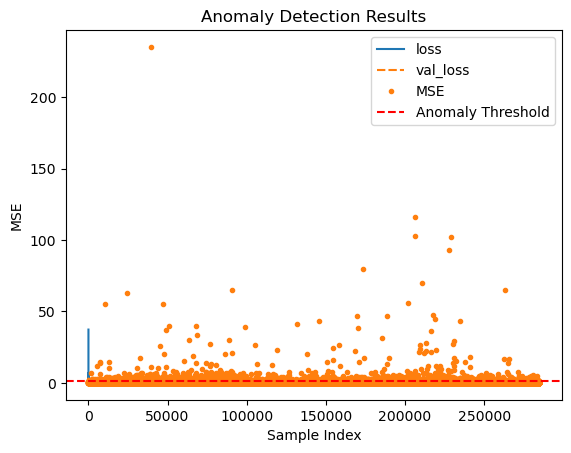

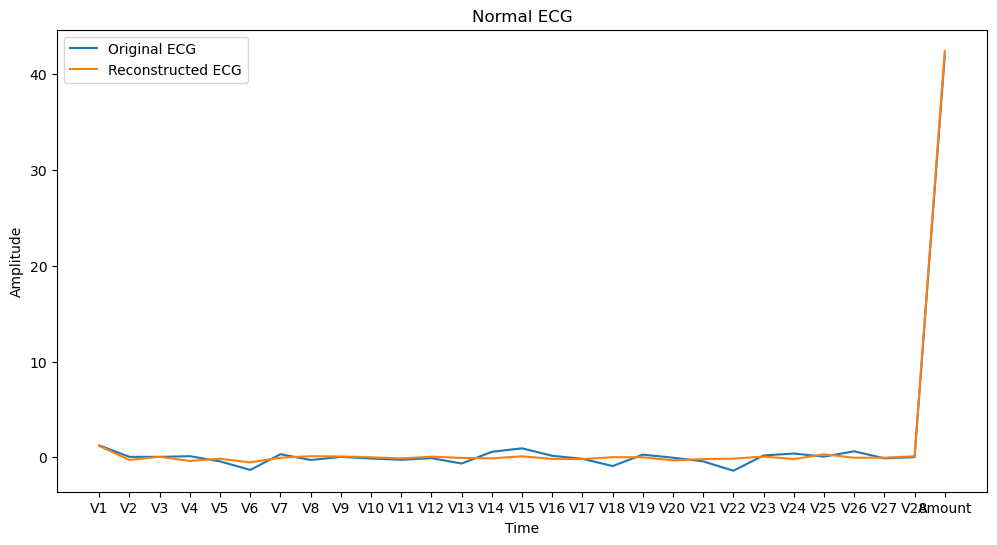

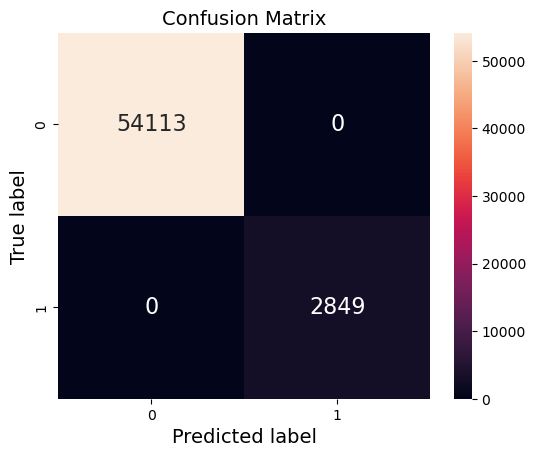

In [52]:
import tensorflow as tf
import pandas as pd
import numpy as np

path = r"D:\Atharva\STUDY\I2IT\BE\Academic\DL\Practical\Dataset\Credit Card Dataset-20241102T133506Z-001\Credit Card Dataset\creditcard.csv"
df = pd.read_csv(path)

df = df.drop(['Time','Class'], axis=1)
df

# Preprocess the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.2)

from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models

encoder = tf.keras.models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(20, activation='relu')
])

decoder = tf.keras.models.Sequential([
    layers.Input(shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')  # Use linear activation for reconstruction
])

model = tf.keras.models.Sequential([
    encoder,
    decoder
])

model.compile(optimizer='adam', loss ='mean_squared_error')

history = model.fit(
    x_train,
    x_train,
    validation_data=(x_test,x_test),
    epochs=5,
    batch_size = 100,
    shuffle=True
)

import seaborn as sns
sns.lineplot(model.history.history)

predictions = model.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

threshold = np.percentile(mse, 95)  # Adjust the percentile as needed
print(threshold)
anomalies = mse > threshold

# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

#Plot the anomalies
import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 6))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE', )
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(x_test.iloc[0], label='Original ECG')
plt.plot(predictions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')

plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()

# 10

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3419 - val_loss: 0.1858
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1776 - val_loss: 0.1561
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1528 - val_loss: 0.1415
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1404 - val_loss: 0.1330
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1321 - val_loss: 0.1273
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1271 - val_loss: 0.1235
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1231 - val_loss: 0.1209
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1207 - val_loss: 0.1189
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1190 - val_loss: 0.1176
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1176 - val_loss: 0.1168
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step


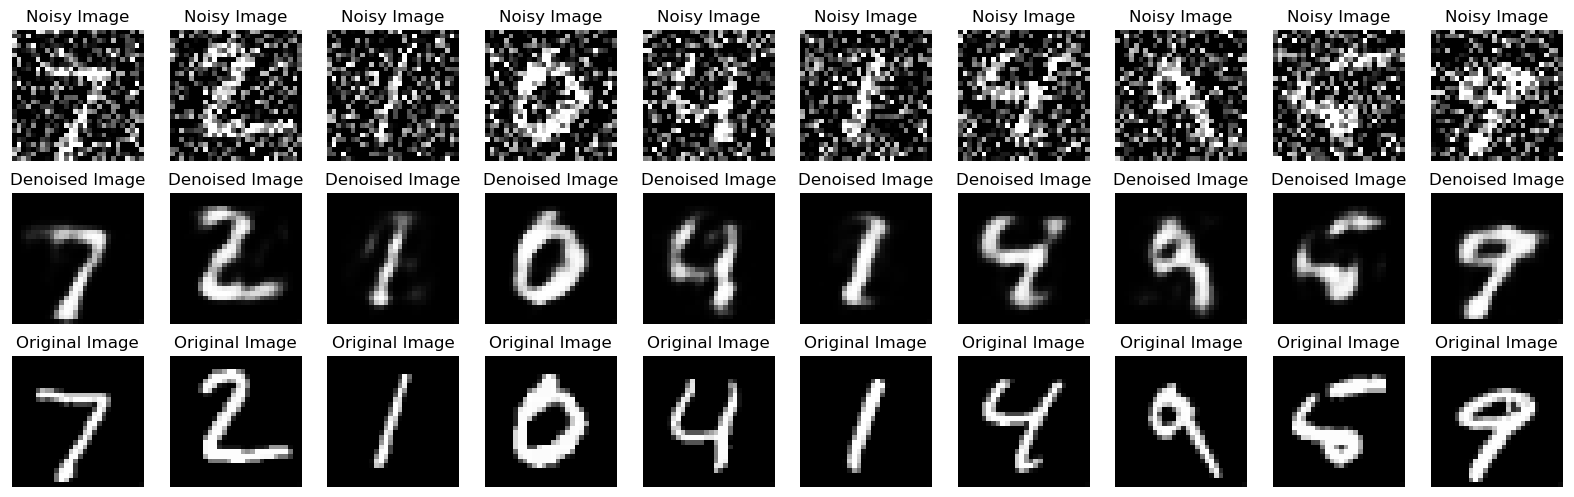

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load the mnist.csv dataset (assuming it's in the current directory and contains 785 columns: 1 label column + 784 pixel columns)
csv_file_path = r"D:\Atharva\STUDY\I2IT\BE\Academic\DL\Practical\SS_Dataset\3 MNIST-20241105T053934Z-001\3 MNIST\mnist_784_csv.csv"
data = pd.read_csv(csv_file_path)

# If the dataset has labels in the first column, remove it (assuming the first column is the label)
x_data = data.iloc[:, 1:].values.astype('float32') / 255.  # Take all columns except the first one

# Split data into train and test sets
# Assume that the first 60000 samples are for training and the remaining 10000 for testing
x_train = x_data[:60000]
x_test = x_data[60000:]

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be in the valid range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Parameters
input_dim = 784  # 28x28 images flattened
encoding_dim = 64  # Size of encoding

# Input layer
input_img = Input(shape=(input_dim,))

# Encoded representation
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoded representation
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Make predictions (denoising)
denoised_imgs = autoencoder.predict(x_test_noisy)

# Plotting original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy Image")
    plt.axis("off")

    # Display denoised image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised Image")
    plt.axis("off")

    # Display original image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

plt.show()


# 10 Online

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3454 - val_loss: 0.1887
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1808 - val_loss: 0.1603
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1570 - val_loss: 0.1443
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1429 - val_loss: 0.1351
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1347 - val_loss: 0.1293
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1293 - val_loss: 0.1250
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1249 - val_loss: 0.1219
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1222 - val_loss: 0.1198
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1202 - val_loss: 0.1185
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1186 - val_loss: 0.1176
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1177 - val_loss: 0.1168
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

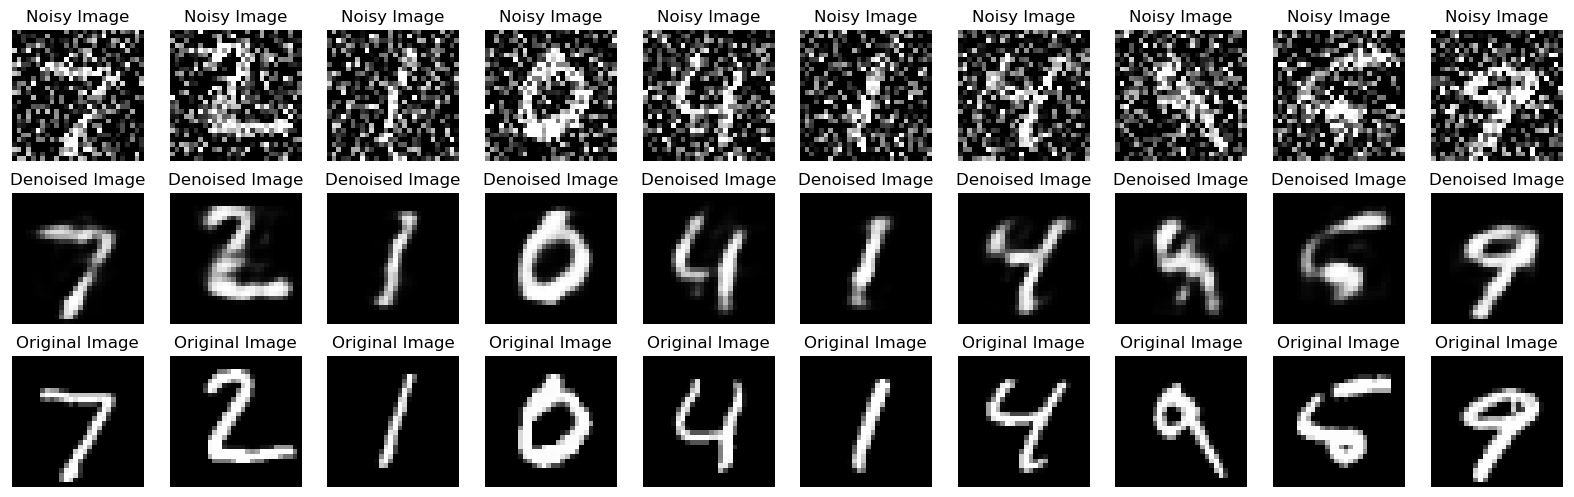

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be in the valid range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Parameters
input_dim = 784  # 28x28 images flattened
encoding_dim = 64  # Size of encoding

# Input layer
input_img = Input(shape=(input_dim,))

# Encoded representation
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoded representation
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Make predictions
denoised_imgs = autoencoder.predict(x_test_noisy)

# Plotting original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy Image")
    plt.axis("off")

    # Display denoised image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised Image")
    plt.axis("off")

    # Display original image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

plt.show()


# 12

In [60]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = r"D:\Atharva\STUDY\I2IT\BE\Academic\DL\Practical\Dataset\food_dataset\training"
test_dir = r"D:\Atharva\STUDY\I2IT\BE\Academic\DL\Practical\Dataset\food_dataset\evaluation"

# Parameters
img_size = (224, 224)  # Input size for the model
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained model (SSD MobileNet)
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
base_model.trainable = False  # Freeze the base model

# Add new layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=10, validation_data=test_generator)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Rescale
    return np.expand_dims(img, axis=0)

# Load and predict
test_image_path = r"D:\Atharva\STUDY\I2IT\BE\Academic\DL\Practical\Dataset\food_dataset\training\Dairy product\4.jpg"
image = load_and_preprocess_image(test_image_path)

# Make predictions
predictions = model.predict(image)
predicted_class = np.argmax(predictions, axis=1)

# Display the image and prediction
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title(f' Predicted: {list(train_generator.class_indices.keys())[predicted_class[0]]}')
plt.axis('off')
plt.show()


Found 404 images belonging to 4 classes.
Found 164 images belonging to 4 classes.
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.2999 - loss: 1.5145 - val_accuracy: 0.5671 - val_loss: 1.1038
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6317 - loss: 0.9221 - val_accuracy: 0.7012 - val_loss: 0.8092
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7362 - loss: 0.7249 - val_accuracy: 0.7439 - val_loss: 0.7165
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8233 - loss: 0.5439 - val_accuracy: 0.7744 - val_loss: 0.6541
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8653 - loss: 0.4637 - val_accuracy: 0.7988 - val_loss: 0.6169
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8959 - loss: 0.3835 - val_accuracy: 0.8049 - val_loss: 0.5939
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8996 - loss: 0.3289 - val_accuracy: 0.8049 - val_loss: 0.5816
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━

In [25]:
import pygit2
pygit2.clone_repository('https://github.com/ajinkya-011/dl', 'src')

# 11

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# Set paths
train_dir = r"D:\Atharva\STUDY\I2IT\BE\Academic\DL\Practical\SS_Dataset\11 Flowers-20241105T101818Z-001\11 Flowers\train"
test_dir = r"D:\Atharva\STUDY\I2IT\BE\Academic\DL\Practical\SS_Dataset\11 Flowers-20241105T101818Z-001\11 Flowers\test"

# Image dimensions
img_height = 224
img_width = 224
batch_size = 32

# Define ImageDataGenerators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # Since we have 5 categories
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load MobileNetV2 pre-trained on ImageNet without the top layer (classification head)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model so that its weights are not updated during training
base_model.trainable = False

# Create a custom head for our model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(5, activation='softmax')  # 5 classes for flowers
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()
# Define callbacks
checkpoint = ModelCheckpoint('flower_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint, early_stop]
)
# Unfreeze the base model
base_model.trainable = True

# Re-compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint, early_stop]
)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc * 100:.2f}%')
import numpy as np
from tensorflow.keras.preprocessing import image

# Load an image
img_path = r"D:\Atharva\STUDY\I2IT\BE\Academic\DL\Practical\SS_Dataset\11 Flowers-20241105T101818Z-001\11 Flowers\test\dandelion\dandelion_108.jpg"
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Map predicted class to flower category
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

print(f'Predicted class: {predicted_label}')


Found 3250 images belonging to 5 classes.
Found 530 images belonging to 5 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ ?                           │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/2


C:\Users\awach\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/101 ━━━━━━━━━━━━━━━━━━━━ 98s 916ms/step - accuracy: 0.6893 - loss: 0.9303 - val_accuracy: 0.8672 - val_loss: 0.3894
Epoch 2/2
  1/101 ━━━━━━━━━━━━━━━━━━━━ 1:06 662ms/step - accuracy: 0.8750 - loss: 0.3472

C:\Users\awach\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8750 - loss: 0.3472 - val_accuracy: 0.7778 - val_loss: 0.4674
Epoch 1/2
101/101 ━━━━━━━━━━━━━━━━━━━━ 380s 4s/step - accuracy: 0.7097 - loss: 0.7915 - val_accuracy: 0.8711 - val_loss: 0.3534
Epoch 2/2
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8125 - loss: 0.5352 - val_accuracy: 0.8889 - val_loss: 0.2527
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 664ms/step - accuracy: 0.8593 - loss: 0.3633
Test Accuracy: 87.11%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step
Predicted class: dandelion


# 13

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download NLTK data files (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Sample corpus
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "I love programming in Python",
    "Natural language processing is fascinating",
    "Word embeddings are useful in many NLP tasks",
    "CBOW is a great way to train word vectors"
]

# Preprocessing
stop_words = set(stopwords.words('english'))
tokenized_corpus = []
for sentence in corpus:
    tokens = word_tokenize(sentence.lower())
    filtered_tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    tokenized_corpus.append(filtered_tokens)

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_corpus)
total_words = len(tokenizer.word_index) + 1  # Plus one for padding

# Create CBOW dataset
def create_cbow_dataset(corpus, window_size):
    context_words = []
    target_words = []

    for tokens in corpus:
        for i, target in enumerate(tokens):
            start = max(0, i - window_size)
            end = min(len(tokens), i + window_size + 1)
            context = [tokens[j] for j in range(start, end) if j != i]
            target_words.append(target)
            context_words.append(context)

    return context_words, target_words

# Set window size
window_size = 2
context, target = create_cbow_dataset(tokenized_corpus, window_size)

# Convert context and target words to sequences
context_sequences = tokenizer.texts_to_sequences([' '.join(c) for c in context])
target_sequences = tokenizer.texts_to_sequences(target)

# Pad the context sequences
max_length = max(len(seq) for seq in context_sequences)  # Find the maximum length
X = pad_sequences(context_sequences, maxlen=max_length, padding='post')
y = np.array(target_sequences).flatten()

# Convert target sequences to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Build the CBOW model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=64, input_length=X.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=1)

# Example context to test
test_context = "the brown fox".split()
test_sequence = tokenizer.texts_to_sequences([' '.join(test_context)])

# Pad the test sequence
test_sequence = pad_sequences(test_sequence, maxlen=max_length, padding='post')

# Make predictions
predicted = model.predict(test_sequence)
predicted_word_index = np.argmax(predicted, axis=1)

# Display the predicted word
predicted_word = tokenizer.index_word[predicted_word_index[0]]
print(f"Predicted Word for context '{' '.join(test_context)}': {predicted_word}")
